In [18]:
import pandas as pd
import numpy as np

from itertools import groupby
from sklearn.preprocessing import MultiLabelBinarizer

import json
import glob
import matplotlib.pyplot as plt

In [2]:
def openfile(data):
    if data == "writers":
        with open("writing.json") as f:
            writers = f.read()
        
        return json.loads(writers)
    elif data == "directors":
        with open("directing.json") as f:
            directors = f.read()
        
        return json.loads(directors)    
    else:
        return NotImplemented    

In [8]:
all_files = glob.glob("train*.csv")

print(f"Found files: {', '.join(all_files)}")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

df = pd.concat(li, axis=0, ignore_index=True).drop("Unnamed: 0", axis = 1)

Found files: train-8.csv, train-2.csv, train-7.csv, train-5.csv, train-3.csv, train-4.csv, train-1.csv, train-6.csv


In [10]:
df = df.replace("\\N", np.nan)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7959 entries, 0 to 7958
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tconst          7959 non-null   object 
 1   primaryTitle    7959 non-null   object 
 2   originalTitle   3971 non-null   object 
 3   startYear       7173 non-null   object 
 4   endYear         786 non-null    object 
 5   runtimeMinutes  7946 non-null   object 
 6   numVotes        7169 non-null   float64
 7   label           7959 non-null   bool   
dtypes: bool(1), float64(1), object(6)
memory usage: 443.2+ KB


In [11]:
def merge_start_end_year(df_):
    df_['startYear'].fillna(df_['endYear'], inplace=True)
    return df_

In [16]:
# preprocess some of the data
df = merge_start_end_year(df)
df["primaryTitle"] = df["primaryTitle"].str.lower()\
                                       .str.normalize('NFKD')\
                                       .str.encode('ascii', errors='ignore')\
                                       .str.decode('utf-8')\
                                       .str.replace(" ", "_", regex=True)\
                                       .str.replace("\W", "", regex=True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7959 entries, 0 to 7958
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tconst          7959 non-null   object 
 1   primaryTitle    7959 non-null   object 
 2   originalTitle   3971 non-null   object 
 3   startYear       7959 non-null   object 
 4   endYear         786 non-null    object 
 5   runtimeMinutes  7946 non-null   object 
 6   numVotes        7169 non-null   float64
 7   label           7959 non-null   bool   
dtypes: bool(1), float64(1), object(6)
memory usage: 443.2+ KB


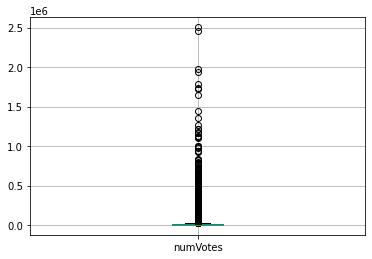

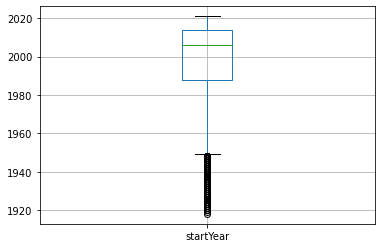

<AxesSubplot:>

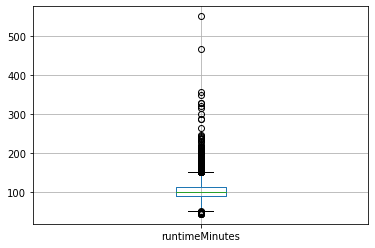

In [28]:
df['startYear'] = df['startYear'].astype(int)
df['runtimeMinutes'] = df['runtimeMinutes'].astype(float)

df.boxplot(column=['numVotes'])
plt.show()
df.boxplot(column=['startYear'])
plt.show()
df.boxplot(column=['runtimeMinutes'])